In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:

df = pd.read_csv("/content/Language Detection.csv")

In [3]:
df

Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]

In [4]:
# Value cout of each language
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
# contplot for Language columns
sns.countplot(y=df['Language'])
plt.title('Value Counts for languages')

plt.show()


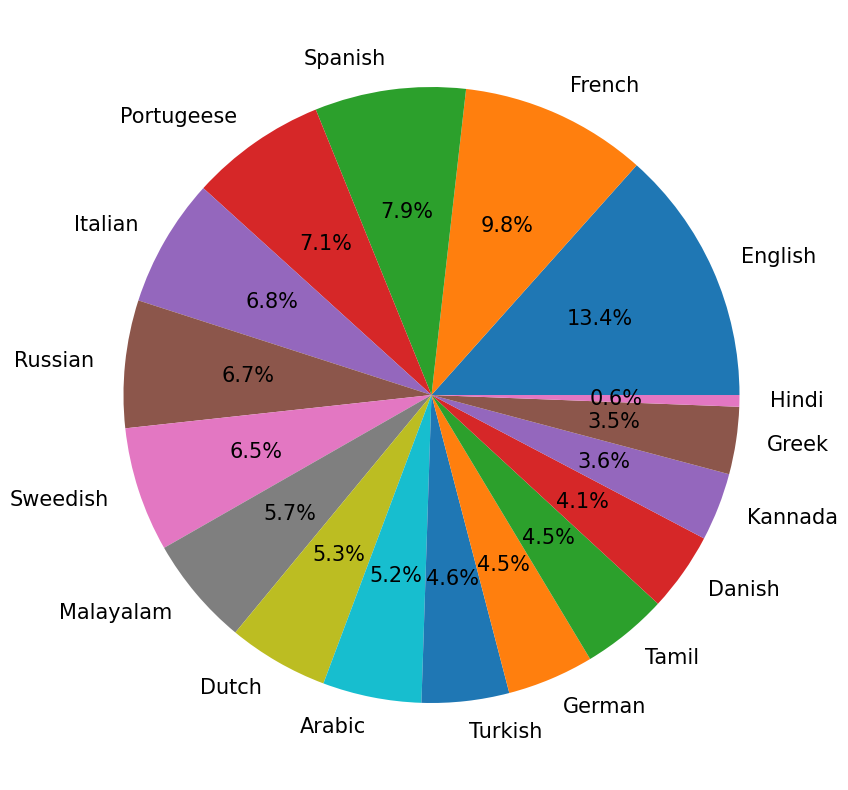

In [6]:
language = df["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [7]:
X = df['Text']
y = df['Language']

# Label Encoding
Converting categorical variables to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Processing

In [9]:
import re     # regular expression
df_list = []
for Text in X:
    Text = re.sub(r'[!@#$(),\n"%^&*:;~0-9]', ' ',Text)
    Text = re.sub('[[]]',' ',Text)
    Text = Text.lower()
    df_list.append(Text)

<ipython-input-9-545e43d8550e>:5: FutureWarning: Possible nested set at position 1
  Text = re.sub('[[]]',' ',Text)


# Bag of Words

In [10]:
# Creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()

In [11]:
X.shape

(10337, 39404)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

# Model creation and Prediction

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [14]:
# Prediction
y_pred = model.predict(x_test)

# Prediction

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [16]:
print("Accuracy is :",ac)

Accuracy is : 0.9792069632495164


In [17]:
accuracy_score(y_test,y_pred)

0.9792069632495164

In [18]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       1.00      0.95      0.97        92
           2       1.00      0.99      1.00       116
           3       0.90      1.00      0.95       284
           4       0.98      0.99      0.99       210
           5       1.00      0.98      0.99        87
           6       1.00      0.99      0.99        82
           7       1.00      0.92      0.96        12
           8       0.98      0.99      0.99       114
           9       1.00      0.96      0.98        69
          10       0.98      0.98      0.98        98
          11       0.99      0.97      0.98       152
          12       1.00      0.98      0.99       141
          13       1.00      0.96      0.98       188
          14       0.97      0.99      0.98       110
          15       1.00      1.00      1.00        89
          16       1.00      0.92      0.96       100

    accuracy              

In [19]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(x_train, y_train)

In [19]:
y_predsv=svm.predict(x_test)